In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [33]:
data=pd.read_csv("classification_data9.csv")


In [34]:
data.describe()

,x_1,x_2,y
count,300.000000,300.000000,300.000000
mean,4.838488,3.961575,0.500000
std,4.080293,2.760414,0.500835
min,-1.729020,-1.121061,0.000000
25%,0.908427,1.342451,0.000000
50%,4.526135,3.928230,0.500000
75%,8.847560,6.649956,1.000000
max,11.484430,9.307988,1.000000


In [35]:
b = np.array(data['x_2'])
a = np.array(data['x_1'])
y=np.array(data['y'])
x= np.zeros((len(y),2))


for i in range (len(y)):
    
    x [i][0]= a[i]
    x[i][1] = b[i]

In [36]:
for i in range(len(y)):
    if (y[i]==0):
        y[i] = -1
y
# 2 classes 

array([-1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [37]:
def split(x,y):
    n =len(y)//4
    trainx = np.zeros((len(y)-n,2))
    #trainx2 = np.zeros(len(y)-n)
    trainy = np.zeros(len(y)-n)
    testx = np.zeros((n,2))
    #testx2 = np.zeros(n)
    testy = np.zeros(n)
    indtrain =0
    indtest =0
    for a in range(len(y)):
        if (a % 4 !=0 ):
            trainx[indtrain][0]=x[a][0]
            trainx[indtrain][1]=x[a][1]
            
            trainy[indtrain]=y[a]
            indtrain=indtrain+1

        else : 
            testx[indtest][0]=x[a][0]
            testx[indtest][1]=x[a][1]
            testy[indtest]=y[a]
            indtest=indtest+1
    
    return trainx,trainy ,testx,  testy
    

In [38]:
trainx,trainy ,testx,  testy = split(x,y)

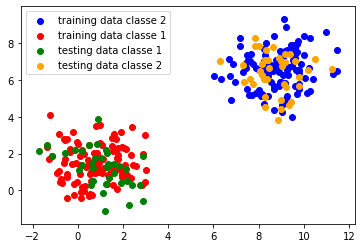

In [39]:
l = np.linspace(-2, 2, 200)
col ={1 :"blue", -1:"red"}
col2 ={1 :"orange", -1:"green"}
plt.scatter(trainx[0][0], trainx[0][1],color=col[trainy[0]], label = "training data classe 2")
for i in range (1,len(trainy)-1):
    plt.scatter(trainx[i][0], trainx[i][1],color=col[trainy[i]])
plt.scatter(trainx[len(trainy)-1][0], trainx[len(trainy)-1][1],color=col[trainy[len(trainy)-1]], label = "training data classe 1")
plt.scatter(testx[0][0], testx[0][1],color=col2[testy[0]], label = "testing data classe 1")
for i in range (len(testy)-1):
    plt.scatter(testx[i][0], testx[i][1],color=col2[testy[i]])
plt.scatter(testx[len(testy)-1][0], testx[len(testy)-1][1],color=col2[testy[len(testy)-1]],label = "testing data classe 2 ")
    
plt.legend()
plt.show()

In [40]:
#Is it supervised learning because we don't have any missing data.


In [41]:
#perceptron 
def ls(x,w,b,y):
    ls =0
    for i in range(len(y)):
        if (((np.dot(w,x[i])+b)*y[i]) < 0 ) :
            ls=ls+1
    return ls/len(x)

In [42]:
trainy

array([ 1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1

In [43]:
def perceptron():
    b =1
    w = np.ones(2)
    erreur = ls(trainx,w,b,trainy)
    while(erreur  != 0 ):
                for i  in range (len(trainx)):
                    pr = ((np.dot(w,trainx[i]))+b)*trainy[i]
                    
                    if (pr < 0 ):
                        b  = b  + y[i]
                        w[0] = w[0] +  trainy[i]*trainx[i][0]
                        w[1] = w[1] + trainy[i]*trainx[i][1]
                erreur = ls(trainx,w,b,trainy)
                
   
                
    return w , b
    

In [44]:
wfinal ,b = perceptron()


KeyboardInterrupt: 

In [280]:
wfinal 


array([ 3.6232086 , -0.66522638])

In [ ]:
b

In [116]:
w=[1,0]
for i in range(len(trainy)):
        if ((np.dot(w,trainx[i])*trainy[i])< = 0 ) :
            print(trainx[i])

In [45]:
def droite(b,w,x):
    a = (-1/w[1])*(b+w[0]*x)
    return a

In [150]:
w =[0,1]
b= 1

In [152]:
f =(-1/w[1])*(b+w[0]*x[0][0])
print(f)
print(y[0])

-1.0
0


0.0


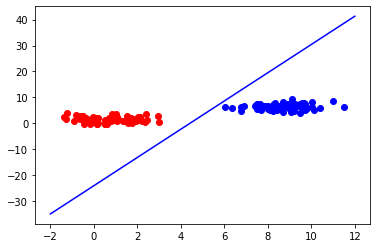

In [281]:
l = np.linspace(-2, 2, 200)
col ={1 :"blue", -1:"red"}
col2 ={1 :"orange", -1:"green"}
for i in range (len(trainy)):
    plt.scatter(trainx[i][0], trainx[i][1],color=col[trainy[i]])
l = np.linspace(-2, 12, 200)
plt.plot(l,droite(b,wfinal,l),color='blue')
print(ls(trainx,wfinal,b,trainy))
plt.show()

In [46]:
#6  
def noise(y):
    d = (len(x)*7)//100
    for j in range(d):
        r = random.randint(0, len(y))
        if (y[r]==1):
            y[r] = -1 
    return y
    
    

In [47]:
y = noise(y)

In [48]:
trainx,trainy ,testx,  testy = split(x,y)

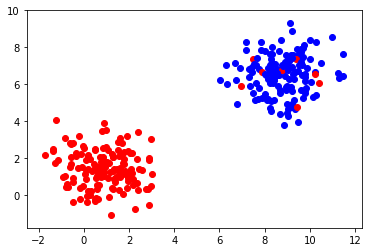

In [49]:
l = np.linspace(-2, 2, 200)
col ={1 :"blue", -1:"red"}

for i in range (len(y)):
    plt.scatter(x[i][0], x[i][1],color=col[y[i]])
#l = np.linspace(-2, 12, 200)
#plt.plot(l,droite(b,wfinal,l),color='blue')
#print(ls(x,wfinal,b,trainy))
plt.show()

In [50]:
def sign(x):
    if (x <0):
        return -1 
    else:
        return 1 

In [51]:
def adaline():
    b=0 
    w= [1,1]
    for i in range(3000):
        for j in range(len(trainx)):
            signe = sign(np.dot(w,trainx[j])+b)
            e = trainy[j]-signe
            if (e != 0):
                b = b +2*e
                w[0]=w[0]+2*e*trainx[j][0]
                w[1]=w[1]+2*e*trainx[j][1]
    return w , b 
            

In [52]:
w , b = adaline()

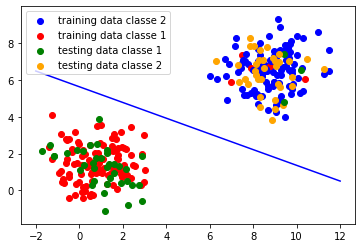

In [53]:
l = np.linspace(-2, 12, 200)
col ={1 :"blue", -1:"red"}
col2 ={1 :"orange", -1:"green"}
plt.scatter(trainx[0][0], trainx[0][1],color=col[trainy[0]], label = "training data classe 2")
for i in range (1,len(trainy)-1):
    plt.scatter(trainx[i][0], trainx[i][1],color=col[trainy[i]])
plt.scatter(trainx[len(trainy)-1][0], trainx[len(trainy)-1][1],color=col[trainy[len(trainy)-1]], label = "training data classe 1")
plt.scatter(testx[0][0], testx[0][1],color=col2[testy[0]], label = "testing data classe 1")
for i in range (len(testy)-1):
    plt.scatter(testx[i][0], testx[i][1],color=col2[testy[i]])
plt.scatter(testx[len(testy)-1][0], testx[len(testy)-1][1],color=col2[testy[len(testy)-1]],label = "testing data classe 2 ")
plt.plot(l,droite(b,w,l),color='blue')
#print(ls(x,wfinal,b,trainy))
plt.legend()
plt.show()